# Análise Macroeconômica: Dinâmica do Câmbio (USD/BRL) e Ciclos de Commodities

In [ ]:
# Bibliotecas importadas:
from bcb import sgs
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import display, Markdown

# DOWNLOAD FATIADO (Histórico Completo do Plano Real)

texto_1 = f"""#### Conectando ao Banco Central do Brasil... Baixando histórico completo desde 1994..."""
display(Markdown(texto_1))

# A transição e o início (1994 a 2003) dados em Cruzeiro Real que limparemos depois
df_90s = sgs.get({'Cotação': 1}, start='1994-01-01', end='2003-12-31') # Fatia 1
df_00s = sgs.get({'Cotação': 1}, start='2004-01-01', end='2013-12-31') # Fatia 2
df_10s = sgs.get({'Cotação': 1}, start='2014-01-01', end='2023-12-31') # Fatia 3
df_20s = sgs.get({'Cotação': 1}, start='2024-01-01', end='2025-12-31') # Fatia 4

# Juntando todos os dataframes:
df_dolar = pd.concat([df_90s, df_00s, df_10s, df_20s])

# Removi o período do "Cruzeiro Real" (Jan a Jun de 1994) e deixei a partir de 01/07/1994 (Nascimento do Real)
df_dolar = df_dolar.loc['1994-07-01' : '2025-12-31']

#### Conectando ao Banco Central do Brasil... Baixando histórico completo desde 1994...

In [ ]:
texto_2 = f"### HISTÓRICO COMPLETO DO REAL CARREGADO"
display(Markdown(texto_2))
texto_3 = (f"Nascimento do Real: {df_dolar.index.min().date()}")
display(Markdown(texto_3))
texto_4 = (f"Dados Recentes:     {df_dolar.index.max().date()}")
display(Markdown(texto_4))
texto_5 = (f"Total de Registros: {df_dolar.shape[0]}")
display(Markdown(texto_5))

### HISTÓRICO COMPLETO DO REAL CARREGADO

Nascimento do Real: 1994-07-01

Dados Recentes:     2025-12-31

Total de Registros: 7908

In [ ]:
display(df_dolar.head().T) # Visualizar o começo (Dólar a R$ 1,00!)
display(df_dolar.tail().T) # Final de 2025 (Dólar a R$ 5,50!)

Date,1994-07-01,1994-07-04,1994-07-05,1994-07-06,1994-07-07
Cotação,1.0,0.94,0.932,0.915,0.91


Date,2025-12-24,2025-12-26,2025-12-29,2025-12-30,2025-12-31
Cotação,5.535,5.5413,5.5739,5.5024,5.5024



## 1. Resumo Executivo
O objetivo deste estudo é analisar o comportamento da taxa de câmbio **USD/BRL** (Dólar Comercial) desde a implementação do Plano Real (1994) até o cenário atual (2025), testando a hipótese da correlação inversa com as *Commodities*.

O Brasil, como um dos maiores exportadores globais de matéria-prima, historicamente apresenta uma moeda sensível aos preços internacionais de produtos como **Soja** e **Petróleo**. A teoria econômica sugere que:
> *Quando o preço das commodities sobe, a entrada de dólares via exportação aumenta, o que tende a **valorizar o Real** (dólar cai).*

No entanto, esta análise busca evidenciar não apenas essa correlação, mas também o fenômeno recente de **"Descolamento" (Decoupling)** observado a partir 
de 2020.

---

## 2. A Evolução Histórica (1994-2025)
Abaixo, apresentamos a série histórica completa da moeda brasileira. Podemos observar ciclos distintos:
1.  **Estabilidade Artificial (1994-1998):** O início do Plano Real, com câmbio ancorado/fixo.
2.  **A Flutuação e o Choque (1999-2002):** A liberação do câmbio e a disparada do dólar por risco político.
3.  **O "Milagre" das Commodities (2003-2011):** Período de forte valorização do Real (dólar chegando a R$ 1,56) impulsionado pelo crescimento da China.
4.  **A Crise e o Novo Patamar (2014-Presente):** A perda do grau de investimento e a mudança estrutural do câmbio para patamares do Real mesmo em cenário externo favorável.

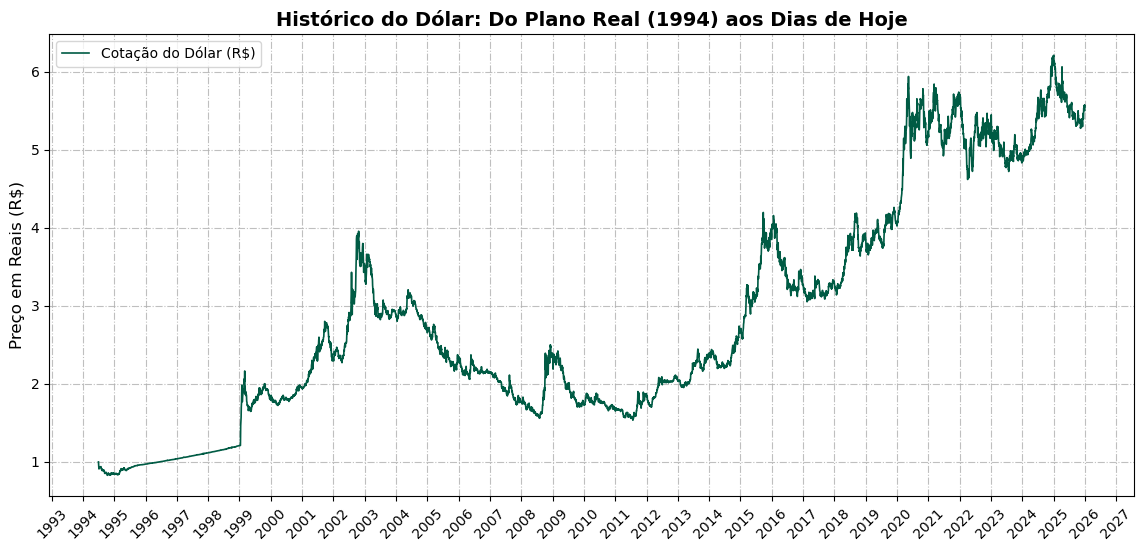


### Recorde Histórico de Baixa
O menor valor já registrado na história do Real foi de **R$ 0.83**.
Esse evento ocorreu no dia **14/10/1994**, durante o início do 'Milagre das Commodities'.

O presidente da época era: **Itamar Franco.**



### Recorde Histórico de Alta
O maior valor já registrado desde o início da história do Real foi de **R$ 6.21**.
E essa alta hitórica ocorreu no dia **02/01/2025**.

O presidente da época era: **Luis Inácio Lula da Silva.**


In [ ]:
# Configuração de tamanho
plt.figure(figsize=(14, 6))
# Plotando a linha do Dólar
plt.plot(df_dolar.index, df_dolar['Cotação'], color='#005b44', label='Cotação do Dólar (R$)', lw=1.2)
plt.title("Histórico do Dólar: Do Plano Real (1994) aos Dias de Hoje", fontsize=14, fontweight='bold')
plt.ylabel("Preço em Reais (R$)", fontsize=12)
plt.grid(True, linestyle='-.', alpha=0.8)
plt.legend()

# EIXO X (Ano a Ano)
ax_d = plt.gca() # Pega o eixo atual (gca = Get Current Axis)
ax_d.xaxis.set_major_locator(mdates.YearLocator(1)) # localizador principal a cada 1 ano.
ax_d.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Aparecer apenas o ANO (4 dígitos).
plt.xticks(rotation=45)
plt.show()

# 1. Encontra o VALOR mínimo e encontra a DATA desse valor mínimo (idxmin = index do mínimo)
minimo_valor = df_dolar['Cotação'].min()
data_minima = df_dolar['Cotação'].idxmin()
# 2. Encontra o VALOR maximo e encontra a DATA desse valor maximo (idxmax = index do maximo)
maximo_valor = df_dolar['Cotação'].max()
data_maxima = df_dolar['Cotação'].idxmax()

texto_dol_min = f"""
### Recorde Histórico de Baixa
O menor valor já registrado na história do Real foi de **R$ {minimo_valor:.2f}**.
Esse evento ocorreu no dia **{data_minima.strftime('%d/%m/%Y')}**, durante o início do 'Milagre das Commodities'.

O presidente da época era: **Itamar Franco.**
"""

texto_dol_max = f"""
### Recorde Histórico de Alta
O maior valor já registrado desde o início da história do Real foi de **R$ {maximo_valor:.2f}**.
E essa alta hitórica ocorreu no dia **{data_maxima.strftime('%d/%m/%Y')}**.

O presidente da época era: **Luis Inácio Lula da Silva.**
"""
display(Markdown(texto_dol_min))
display(Markdown(texto_dol_max))

## 3. A Correlação com Commodities
Para validar a influência da balança comercial no preço da moeda, confrontamos o Dólar com dois dos principais produtos da pauta exportadora brasileira: **Soja** e **Petróleo**.

### A Teoria dos "Termos de Troca"
Historicamente, existe uma **Forte Correlação Negativa** (Inversa). O gráfico abaixo demonstra que nos períodos de *Superciclo de Commodities* (linhas coloridas subindo), o Dólar (linha azul) tende a cair. Isso ocorre devido ao fluxo maciço de moeda estrangeira entrando no país.

In [ ]:
# Baixando dados de Commodities (Yahoo Finance)...Soja (Soybean Futures) e Petróleo (Brent Crude)
# tickers: ZS=F (Soja), BZ=F (Petróleo Brent)
commodities = yf.download(['ZS=F', 'BZ=F'], start='2000-01-01', end='2025-12-31')['Close']

# Renomeando as colunas para facilitar (de 'BZ=F' para 'Petroleo')
commodities.columns = ['Petroleo', 'Soja']

# Preenchendo falhas de feriados (ffill repete o valor do dia anterior)
commodities = commodities.ffill()

# UNIÃO DAS BASES # Removi qualquer linha que ainda tenha (NaN) para não quebrar o cálculo
df_commodities = df_dolar.join(commodities, how='inner')
df_commodities = df_commodities.dropna()

# Removi qualquer linha que ainda tenha buraco (NaN) para não quebrar o cálculo
df_commodities = df_commodities.dropna()

texto_6 = (f"""#### Download das commodities concluído e base unificada! Total de dias em comum: {df_commodities.shape[0]}""")
display(Markdown(texto_6))

[*********************100%***********************]  2 of 2 completed


#### Download das commodities concluído e base unificada! Total de dias em comum: 4512

In [ ]:
with pd.option_context("float_format", "{:.2f}".format):
    display(commodities.head(10).T)
with pd.option_context("float_format", "{:.2f}".format):
    display(commodities.tail(10).T)

# A PROVA MATEMÁTICA (Correlação de Pearson)
# Veja a coluna 'Cotação' -> -1.0 = Movimento oposto (O que queremos provar)
correlacao = df_commodities.corr()

with pd.option_context("float_format", "{:.2f}".format):
    display(correlacao)

Date,2000-09-15,2000-09-18,2000-09-19,2000-09-20,2000-09-21,2000-09-22,2000-09-25,2000-09-26,2000-09-27,2000-09-28
Petroleo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Soja,493.75,484.00,484.25,483.25,486.50,491.00,496.50,496.50,492.50,497.00


Date,2025-12-16,2025-12-17,2025-12-18,2025-12-19,2025-12-22,2025-12-23,2025-12-24,2025-12-26,2025-12-29,2025-12-30
Petroleo,58.92,59.68,59.82,60.47,62.07,62.38,62.24,60.64,61.94,61.92
Soja,1062.75,1058.25,1052.25,1049.25,1053.25,1051.50,1063.25,1058.75,1049.50,1046.25


,Cotação,Petroleo,Soja
Cotação,1.00,-0.41,-0.05
Petroleo,-0.41,1.00,0.72
Soja,-0.05,0.72,1.00


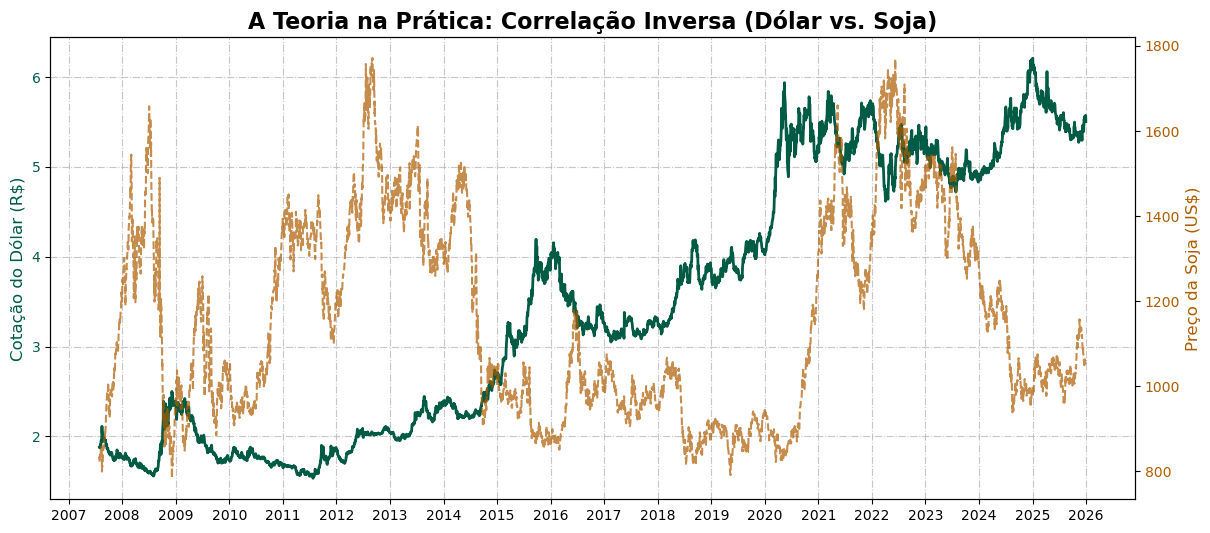

In [ ]:
# Criando a figura e o eixo principal (Dólar)
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plotando o Dólar no eixo da esquerda
ax1.plot(df_commodities.index, df_commodities['Cotação'], color='#005b44', linewidth=2, label='Dólar (R$)')
ax1.set_ylabel('Cotação do Dólar (R$)', color='#005b44', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#005b44')

# Criando o eixo que compartilha a mesma data x
ax2 = ax1.twinx()
# Plotando a Commodity (Soja) no eixo da direita
ax2.plot(df_commodities.index, df_commodities['Soja'], color='#af5c00', linestyle='--', linewidth=1.5, alpha=0.7, label='Soja (Futuro)')
ax2.set_ylabel('Preço da Soja (US$)', color='#af5c00', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#af5c00')
plt.title("A Teoria na Prática: Correlação Inversa (Dólar vs. Soja)", fontsize=16, fontweight='bold')
ax1.grid(True, linestyle='-.', alpha=0.7)

# EIXO X (Ano a Ano)
ax2 = plt.gca()
ax2.xaxis.set_major_locator(mdates.YearLocator(1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

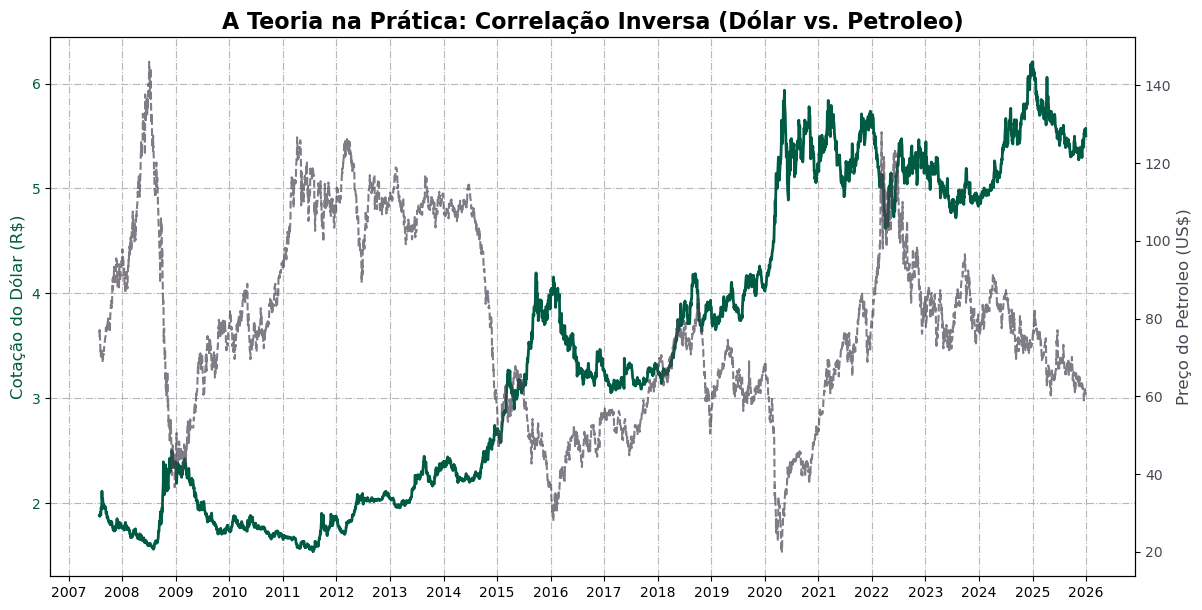

In [ ]:
# Criando a figura e o eixo principal (Dólar)
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotando o Dólar no eixo da esquerda
ax1.plot(df_commodities.index, df_commodities['Cotação'], color='#005b44', linewidth=2, label='Dólar (R$)')
ax1.set_ylabel('Cotação do Dólar (R$)', color='#005b44', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#005b44')

# Criando o eixo que compartilha a mesma data x
ax2 = ax1.twinx()
# Plotando a Commodity (Petróleo) no eixo da direita
ax2.plot(df_commodities.index, df_commodities['Petroleo'], color='#4b4453', linestyle='--', linewidth=1.5, alpha=0.7, label='Petroleo (Futuro)')
ax2.set_ylabel('Preço do Petroleo (US$)', color='#4b4453', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#4b4453')
plt.title("A Teoria na Prática: Correlação Inversa (Dólar vs. Petroleo)", fontsize=16, fontweight='bold')
ax1.grid(True, linestyle='-.', alpha=0.9)

# EIXO X (Ano a Ano)
ax2 = plt.gca()
ax2.xaxis.set_major_locator(mdates.YearLocator(1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show();

## 4. O Fenômeno do Descolamento (2020-2025)
A análise visual revela uma anomalia econômica importante a partir da pandemia de 2020.

Ao contrário do ciclo de 2003-2011, onde a alta das commodities derrubou o dólar, o período recente mostra um cenário onde **Soja e Petróleo atingiram máximas históricas, mas o Dólar NÃO caiu proporcionalmente**, mantendo-se em patamares elevados (acima de R$ 5,00).

**Interpretação do Analista:**
Este comportamento indica uma mudança no peso dos fatores de precificação da moeda:
* **Fator Externo (Comercial):** Continua positivo (superávit comercial recorde).
* **Fator Interno (Risco):** Deteriorou-se. O "Risco Fiscal" (preocupação com as contas públicas) e a instabilidade política geraram um prêmio de risco que anulou o benefício da alta das commodities.

Em suma, **o fluxo financeiro (saída de dólares por aversão a risco) superou o fluxo comercial**, impedindo a apreciação do Real mesmo em cenário externo favorável.

## 5. Análise de Probabilidade e Regimes Econômicos (PDF & CDF)

Para entender a distribuição de frequência da moeda, aplicamos duas ferramentas estatísticas:

**Função Densidade de Probabilidade:** 

As barras azuis mostram onde o preço "passou mais tempo".

**Função de Distribuição Acumulada:** 

A linha vermelha mostra o acúmulo histórico.

**Insight Visual:**
A distribuição é **Multimodal** (possui múltiplos picos), revelando que o Brasil teve três "regimes" cambiais distintos: a âncora cambial (R$ 1,00), o período de estabilidade 2,50  e o novo patamar de risco 5,00 reais.

**Estatística Chave:**
Os dados provam que um dólar acima de **R$ 4,00** é um evento historicamente raro, ocorrendo em apenas **21%** do tempo desde o Plano Real. Isso classifica o momento atual (2020-2025) como um período de desvalorização severa e persistente.

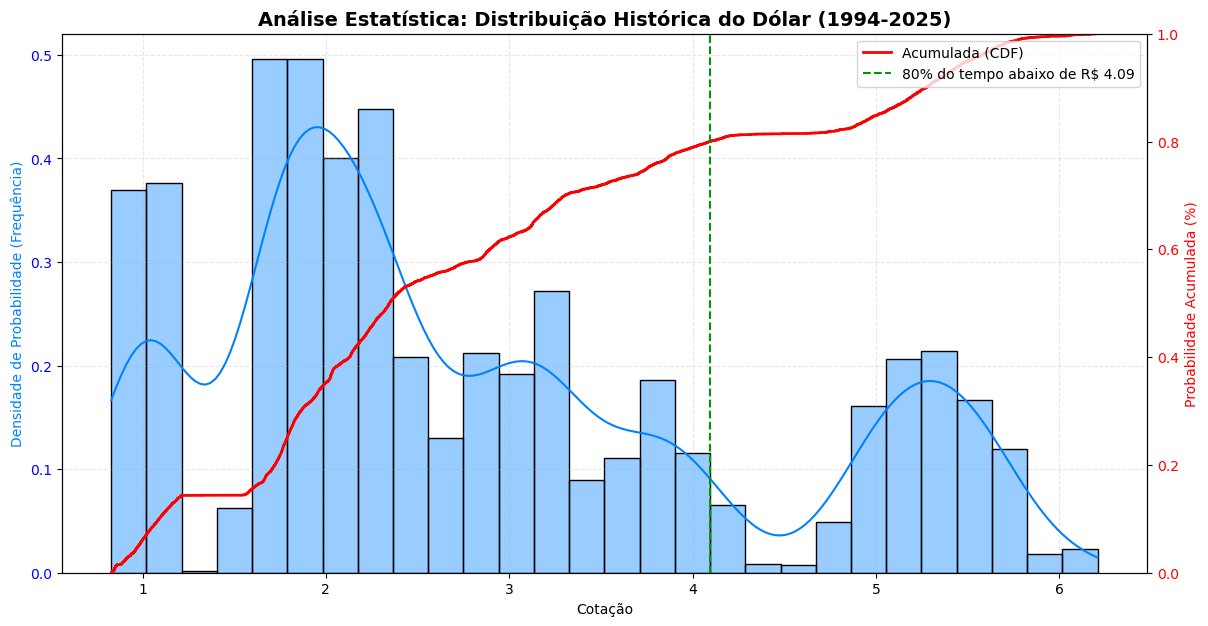


### Conclusão Estatística
A análise da Função de Distribuição Acumulada (CDF) revela um dado histórico crucial:

> **Em 78.9% de todo o período analisado (1994-2025), o Dólar custou MENOS que R$ 4,00.**

Isso confirma que o patamar atual é uma anomalia estatística de cauda longa (evento raro).


In [ ]:
# Configurando o tamanho
fig, ax1 = plt.subplots(figsize=(14, 7))

# A PDF mostra onde os preços se concentram (Barras azuis)
sns.histplot(df_dolar['Cotação'], kde=True, stat="density", color="#0082ff", alpha=0.4, label='Frequência (PDF)', ax=ax1)
ax1.set_ylabel('Densidade de Probabilidade (Frequência)', color='#0082ff')
ax1.tick_params(axis='y', labelcolor='blue')

# A CDF mostra a probabilidade acumulada (Linha Vermelha)
ax2 = ax1.twinx()
sns.ecdfplot(df_dolar['Cotação'], color='red', linewidth=2, label='Acumulada (CDF)', ax=ax2)
ax2.set_ylabel('Probabilidade Acumulada (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Análise Estatística: Distribuição Histórica do Dólar (1994-2025)', fontsize=14, fontweight='bold')
ax1.grid(True, linestyle='--', alpha=0.3)

# Adicionando linhas de referência (Percentis) para análise de risco
p80 = df_dolar['Cotação'].quantile(0.80)
plt.axvline(p80, color='#009700', linestyle='--', label=f'80% do tempo abaixo de R$ {p80:.2f}')
plt.legend(loc='upper right')
plt.show()

# Qual a probabilidade estatística do Dólar ser menor que R$ 4,00?
probabilidade = (df_dolar['Cotação'] < 4.00).mean() * 100
estatistica_historica = (f"Estatística Histórica:\nEm {probabilidade:.1f}% de todo o período analisado, o Dólar custou menos que R$ 4,00.")

texto_final = f"""
### Conclusão Estatística
A análise da Função de Distribuição Acumulada (CDF) revela um dado histórico crucial:

> **Em {probabilidade:.1f}% de todo o período analisado (1994-2025), o Dólar custou MENOS que R$ 4,00.**

Isso confirma que o patamar atual é uma anomalia estatística de cauda longa (evento raro).
"""
display(Markdown(texto_final))

In [ ]:
texto_conclusao = f"""
# 📋 Relatório: A Anatomia do Câmbio (1994-2025)

## 1. O Espectro Histórico (Volatilidade Extrema)
Ao analisarmos 30 anos de dados diários, identificamos os extremos que definiram nossa economia:

O Piso Histórico: O Real atingiu seu valor mais forte de R${minimo_valor:.2f} em {data_minima.strftime('%d/%m/%Y')}.

Contexto: **Governo Itamar Franco** (Pós-lançamento do Plano Real).

O Teto Histórico: A moeda atingiu sua máxima nominal de R${maximo_valor:.2f} em {data_maxima.strftime('%d/%m/%Y')}.

Contexto: **Governo Lula** (Reflexo de riscos fiscais e cenário global desafiador).

---

## 2. Causa e Efeito
A correlação histórica com as Commodities (Soja/Petróleo) sofreu uma **ruptura estrutural**.
> Até 2014, commodities altas garantiam dólar baixo. A partir de 2020, o "Risco Brasil" (fiscal/político) 
tornou-se tão elevado que anulou a entrada de dólares da balança comercial, gerando o fenômeno do Descolamento.
A pandemia deixou uma "cicatriz fiscal". Antes dela, o Brasil tinha regras fiscais rígidas (Teto de Gastos respeitado). 
A pandemia obrigou a quebrar essas regras, e a credibilidade nunca foi totalmente recuperada, mantendo o dólar alto mesmo com a soja batendo recordes.


---

## 3. Veredito Estatístico (A Regra dos 80/20)
A análise da Função de Distribuição Acumulada (CDF) traz a prova matemática definitiva sobre o momento atual:

> **Em {probabilidade:.1f}% da história do Plano Real, o Dólar foi negociado ABAIXO de R$ 4,00.**

**Conclusão Final:**
O patamar atual (acima de R$ 5,00) não é apenas uma oscilação de mercado, é uma **Anomalia Estatística de Cauda Longa**. Isso indica uma mudança estrutural de regime econômico, onde o mercado exige um prêmio de risco permanentemente maior para manter capital no país.
"""

display(Markdown(texto_conclusao))


# 📋 Relatório: A Anatomia do Câmbio (1994-2025)

## 1. O Espectro Histórico (Volatilidade Extrema)
Ao analisarmos 30 anos de dados diários, identificamos os extremos que definiram nossa economia:

O Piso Histórico: O Real atingiu seu valor mais forte de R$0.83 em 14/10/1994.

Contexto: **Governo Itamar Franco** (Pós-lançamento do Plano Real).

O Teto Histórico: A moeda atingiu sua máxima nominal de R$6.21 em 02/01/2025.

Contexto: **Governo Lula** (Reflexo de riscos fiscais e cenário global desafiador).

---

## 2. Causa e Efeito
A correlação histórica com as Commodities (Soja/Petróleo) sofreu uma **ruptura estrutural**.
> Até 2014, commodities altas garantiam dólar baixo. A partir de 2020, o "Risco Brasil" (fiscal/político) 
tornou-se tão elevado que anulou a entrada de dólares da balança comercial, gerando o fenômeno do Descolamento.
A pandemia deixou uma "cicatriz fiscal". Antes dela, o Brasil tinha regras fiscais rígidas (Teto de Gastos respeitado). 
A pandemia obrigou a quebrar essas regras, e a credibilidade nunca foi totalmente recuperada, mantendo o dólar alto mesmo com a soja batendo recordes.


---

## 3. Veredito Estatístico (A Regra dos 80/20)
A análise da Função de Distribuição Acumulada (CDF) traz a prova matemática definitiva sobre o momento atual:

> **Em 78.9% da história do Plano Real, o Dólar foi negociado ABAIXO de R$ 4,00.**

**Conclusão Final:**
O patamar atual (acima de R$ 5,00) não é apenas uma oscilação de mercado, é uma **Anomalia Estatística de Cauda Longa**. Isso indica uma mudança estrutural de regime econômico, onde o mercado exige um prêmio de risco permanentemente maior para manter capital no país.
